# EDA

In [2]:
import pandas as pd
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [39]:
df.shape

(6362620, 11)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [41]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [42]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# DATA VISUALISATION

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

In [44]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [45]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

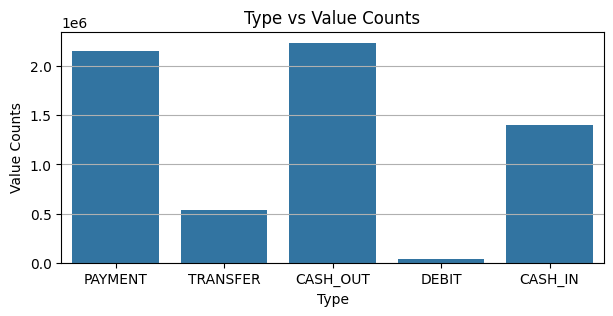

In [46]:
#Bar chart type vs Value Count
plt.figure(figsize=(7,3))
plt.title('Type vs Value Counts')
sns.countplot(data=df,x='type')
plt.xlabel('Type')
plt.ylabel('Value Counts')
plt.grid(axis='y', alpha=1)
plt.show()

In [47]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [48]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

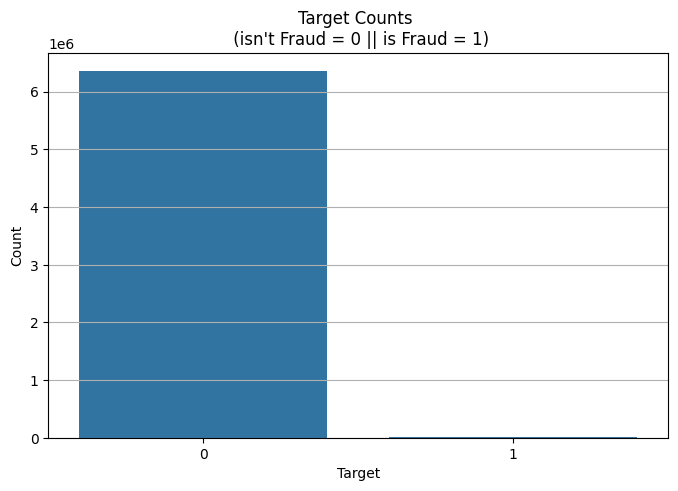

In [49]:
Target_counts = df['isFraud'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.xticks()
plt.grid(axis='y')
plt.show()

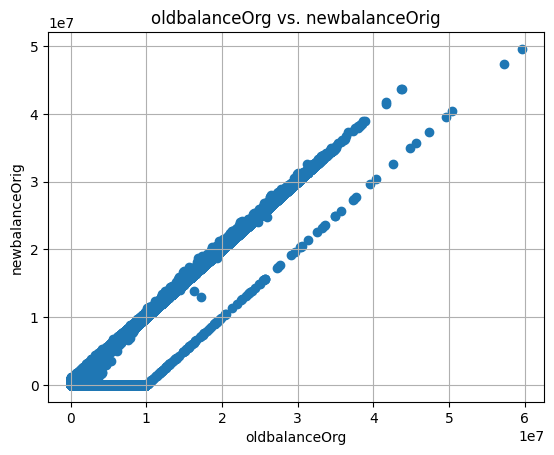

In [22]:
#Visualizing the relationship between 'oldbalanceOrg' and 'newbalanceOrig'
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrig')
plt.grid(True)
plt.show()

# LABEL ENCODING AND DROPPING UNNECESSARY COLUMNS

In [50]:
df['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [51]:
df['type'].value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

In [52]:
df.drop(['isFlaggedFraud', 'step','nameOrig', 'nameDest'], axis=1, inplace=True)

In [53]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [54]:
df.shape

(6362620, 7)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [56]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,3,181.00,181.0,0.00,0.0,0.0,1
3,0,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


# DATA PROCESSING

In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')

In [58]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [61]:
# X Data
X = df.drop(['isFraud'], axis=1)
print( X.shape)
print()
# y Data
y = df['isFraud']
print(y.shape)

(6362620, 6)

(6362620,)


In [62]:
# Fit and transform the features
X_scaled = scaler.fit_transform(X)
# Convert the scaled features into a dataframe
X = pd.DataFrame(X_scaled, columns=X.columns)

# MACHINE LEARNING USING LOGISTIC REGRESSION AND DECISION TREE

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [80]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR=LR.predict(X_test)

# Quick evaluation
Test_Accuracy = LR.score(X_test, y_test)
print(Test_Accuracy)

0.9986750741046927


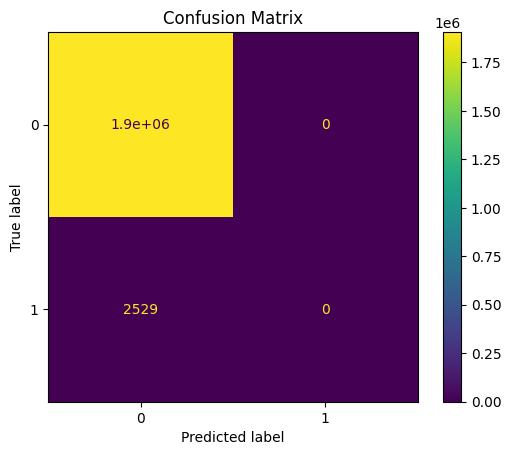

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=df['isFraud'].unique()).plot()
plt.title('Confusion Matrix')
plt.show()

In [82]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906257
           1       0.00      0.00      0.00      2529

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



In [67]:
#Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)

# Quick evaluation
Accuracy = clf.score(X_test, y_test)
print(Accuracy)

0.9997170976735998


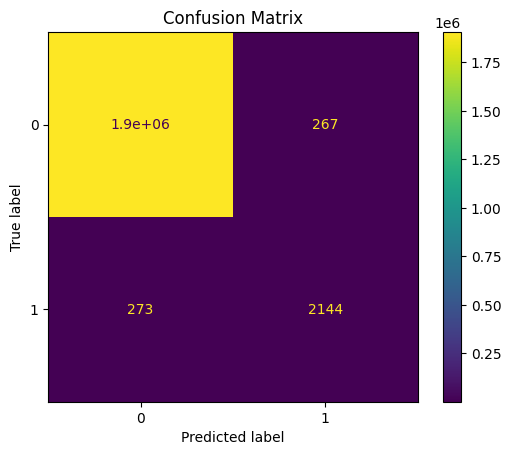

In [71]:
# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_predict)
ConfusionMatrixDisplay(CM, display_labels=df['isFraud'].unique()).plot()
plt.title('Confusion Matrix')
plt.show()

In [77]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906369
           1       0.89      0.89      0.89      2417

    accuracy                           1.00   1908786
   macro avg       0.94      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

